In [1]:
from astropy.table import Table
import healpy as hp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

from sphinterp import nn_interp_hpx, idw_interp_hpx

plt.rcParams["figure.dpi"] = 150

In [2]:
help(nn_interp_hpx)

Help on function nn_interp_hpx in module sphinterp:

nn_interp_hpx(cat: pandas.core.frame.DataFrame | astropy.table.table.Table | polars.dataframe.frame.DataFrame, nside: int = 512, upper_lat_limit_deg: float = 90, lower_lat_limit_deg: float = -90, interp_column: str = 'rm', lon_column: str = 'ra', lat_column: str = 'dec', frame: str = 'icrs') -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[numpy.floating]]
    Fast nearest-neighbor interpolation onto a HEALPix grid.

    Example usage:
    >>> my_cat = Table.read("cat.fits") # read data
    >>> interp_array = nn_interp_hpx(cat=my_cat) # interpolate
    >>> _ = hp.mollview(interp_array) # plot with healpy

    Args:
        cat (pd.DataFrame | Table | pl.DataFrame): Table-like catalogue dataframe
        nside (int, optional): HEALPix Nside. Defaults to 512.
        upper_lat_limit_deg (float, optional): Upper latitude limit in degreees. Defaults to 90.
        lower_lat_limit_deg (float, optional): Lower latitude limit in degreee

In [3]:
help(idw_interp_hpx)

Help on function idw_interp_hpx in module sphinterp:

idw_interp_hpx(cat: pandas.core.frame.DataFrame | astropy.table.table.Table | polars.dataframe.frame.DataFrame, nside: int = 512, upper_lat_limit_deg: float = 90, lower_lat_limit_deg: float = -90, interp_column: str = 'rm', lon_column: str = 'ra', lat_column: str = 'dec', frame: str = 'icrs', search_radius: astropy.units.quantity.Quantity = <Quantity 60. arcmin>, inner_radius: astropy.units.quantity.Quantity = <Quantity 0. deg>) -> numpy.ndarray[tuple[typing.Any, ...], numpy.dtype[numpy.floating]]
    Inverse-square weighted interpolation onto a HEALPix grid.

    Example usage:
    >>> my_cat = Table.read("cat.fits") # read data
    >>> interp_array = idw_interp_hpx(cat=my_cat) # interpolate
    >>> _ = hp.mollview(interp_array) # plot with healpy

    Args:
        cat (pd.DataFrame | Table | pl.DataFrame): Table-like catalogue dataframe
        nside (int, optional): HEALPix Nside. Defaults to 512.
        upper_lat_limit_deg (fl

In [4]:
tab = Table.read("spice-racs.dr1.fits")

In [5]:
spica = SkyCoord.from_name("Spica")

In [6]:
nside = 256
nn_hpx_array = nn_interp_hpx(
    cat=tab,
    nside=nside,
)
idw_hpx_array = idw_interp_hpx(
    cat=tab,
    nside=nside,
    search_radius=2*u.deg,
)

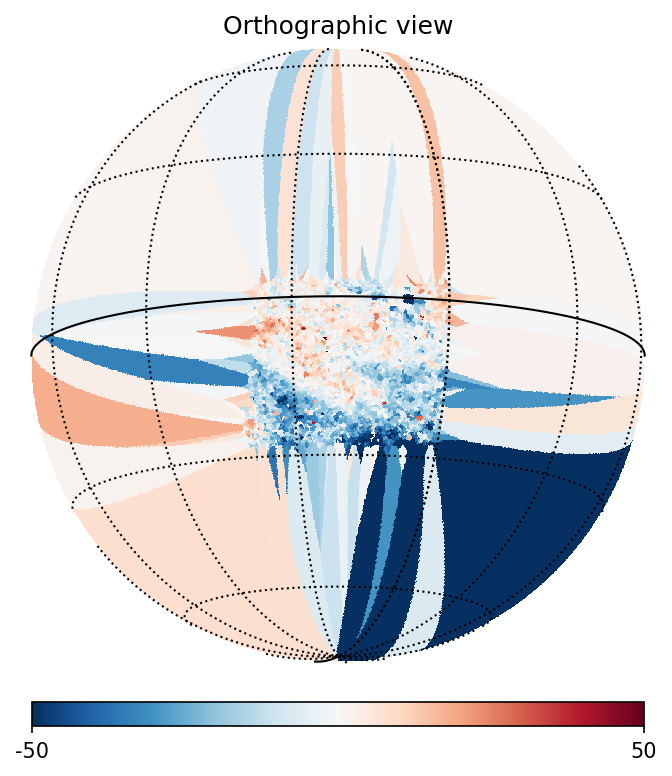

In [7]:
hp.orthview(
    nn_hpx_array,
    min=-50,
    max=50,
    cmap=plt.cm.RdBu_r,
    rot=(spica.ra.deg, spica.dec.deg),
    half_sky=True,
    xsize=1000,
)
hp.graticule()

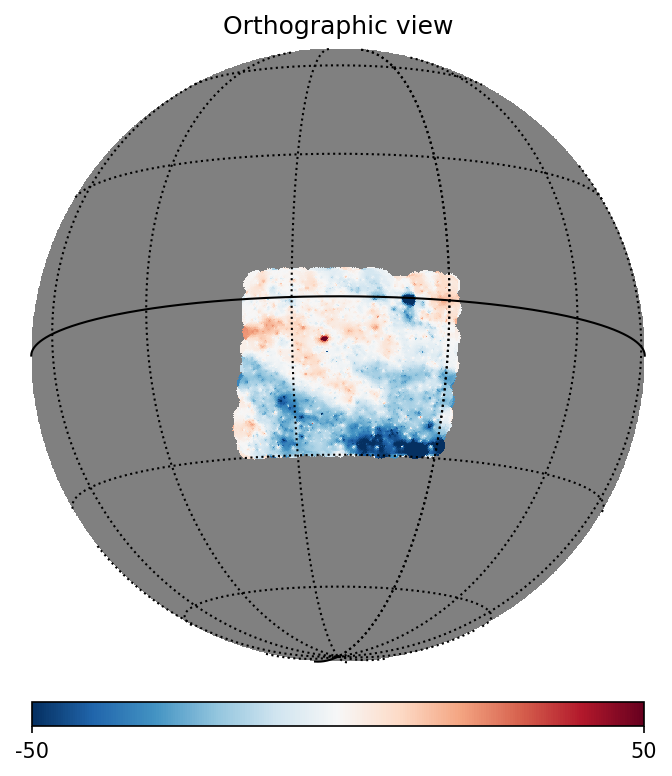

In [8]:
hp.orthview(
    idw_hpx_array,
    min=-50,
    max=50,
    cmap=plt.cm.RdBu_r,
    rot=(spica.ra.deg, spica.dec.deg),
    half_sky=True,
    xsize=1000
)
hp.graticule()